#Import


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
root_dir = "/content/drive/MyDrive/패턴인식"
data_path = os.path.join(root_dir, "train.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
from google.colab import files
from sklearn.preprocessing import PolynomialFeatures

train = pd.read_csv(data_path)
strategy_df = pd.read_csv("/content/drive/MyDrive/패턴인식/strategy_df.csv")
test = pd.read_csv("/content/drive/MyDrive/패턴인식/test.csv")

#Mean Median Mode

In [ ]:
strategies = strategy_df.iloc[:, 7]
columns = strategy_df.iloc[:, 1]

strategy_map = dict(zip(columns, strategies))
print("결측치 남은 개수:", test.isnull().sum().sum())

for col, strategy in strategy_map.items():
    if col not in train.columns:
        continue
    if strategy == "mean":
        train[col].fillna(train[col].mean(), inplace=True)
        test[col].fillna(test[col].mean(), inplace=True)
    elif strategy == "median":
        train[col].fillna(train[col].median(), inplace=True)
        test[col].fillna(test[col].median(), inplace=True)
    elif strategy == "mode":
        train[col].fillna(train[col].mode().iloc[0], inplace=True)
        test[col].fillna(test[col].mode().iloc[0], inplace=True)
    else:
        print(f"⚠️ 알 수 없는 전략: {col} → {strategy}")

print("결측치 남은 개수:", test.isnull().sum().sum())
train.to_csv('train_clean.csv', index = False)
files.download("train_clean.csv")
test.to_csv("test_clean.csv", index = False)
files.download("test_clean.csv")

test.shape

결측치 남은 개수: 43850
⚠️ 알 수 없는 전략: n_unique_tokens → linear regression with 'n_non_stop_unique_tokens' or median
⚠️ 알 수 없는 전략: n_non_stop_words → linear regression with 'n_unique_tokens' or median
⚠️ 알 수 없는 전략: kw_max_min → linear regression with 'kw_avg_min' or median
⚠️ 알 수 없는 전략: kw_avg_min → linear regression with 'kw_max_min' or median
⚠️ 알 수 없는 전략: kw_max_avg → polynomial regression with 'kw_avg_avg' or median
⚠️ 알 수 없는 전략: kw_avg_avg → polynomial regression with 'kw_max_avg' or median
⚠️ 알 수 없는 전략: self_reference_max_shares → linear regression with 'self_reference_avg_sharess' or median
⚠️ 알 수 없는 전략: self_reference_avg_sharess → linear regression with 'self_reference_max_shares' or median


<ipython-input-42-80cdbc050ba7>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mean(), inplace=True)
<ipython-input-42-80cdbc050ba7>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

결측치 남은 개수: 7638


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(9515, 47)

# Linear Regression

In [ ]:
from re import X
from sklearn.linear_model import LinearRegression

train_clean = pd.read_csv("/content/train_clean.csv")
test_clean = pd.read_csv("/content/test_clean.csv")

# n_unique_tokens에 결측치가 있는 데이터를 선택
to_fill = train_clean[train_clean["n_unique_tokens"].isnull()]
to_fill_test = test_clean[test_clean["n_unique_tokens"].isnull()]

# n_unique_tokens에 대해 n_non_stop_unique_tokens를 사용한 선형 회귀 모델 학습
df_for_regression = train_clean.dropna(subset=["n_unique_tokens", "n_non_stop_unique_tokens"])
df_for_regression_test = test_clean.dropna(subset=["n_unique_tokens", "n_non_stop_unique_tokens"])

X_regression = df_for_regression[["n_non_stop_unique_tokens"]]
y_regression = df_for_regression["n_unique_tokens"]
X_regression_test = df_for_regression_test[["n_non_stop_unique_tokens"]]
y_regression_test = df_for_regression_test["n_unique_tokens"]

# 회귀 모델 학습
reg_model = LinearRegression()
reg_model.fit(X_regression, y_regression)
reg_model.fit(X_regression_test, y_regression_test)

# 예측할 데이터에 대해 예측
X_pred = to_fill[["n_non_stop_unique_tokens"]]
y_pred = reg_model.predict(X_pred)
X_pred_test = to_fill_test[["n_non_stop_unique_tokens"]]
y_pred_test = reg_model.predict(X_pred_test)

# 예측값으로 결측치 채우기
train_clean.loc[to_fill.index, "n_unique_tokens"] = y_pred
test_clean.loc[to_fill_test.index, "n_unique_tokens"] = y_pred_test

In [ ]:
to_fill = train_clean[train_clean["n_non_stop_words"].isnull()]
to_fill_test = test_clean[test_clean["n_non_stop_words"].isnull()]

df_for_regression = train_clean.dropna(subset=["n_non_stop_words", "n_unique_tokens"])
df_for_regression_test = test_clean.dropna(subset=["n_non_stop_words", "n_unique_tokens"])

X_regression = df_for_regression[["n_unique_tokens"]]
y_regression = df_for_regression["n_non_stop_words"]
X_regression_test = df_for_regression_test[["n_unique_tokens"]]
y_regression_test = df_for_regression_test["n_non_stop_words"]

reg_model = LinearRegression()
reg_model.fit(X_regression, y_regression)
reg_model = LinearRegression()
reg_model.fit(X_regression_test, y_regression_test)

X_pred = to_fill[["n_unique_tokens"]]
y_pred = reg_model.predict(X_pred)
X_pred_test = to_fill_test[["n_unique_tokens"]]
y_pred_test = reg_model.predict(X_pred_test)

train_clean.loc[to_fill.index, "n_non_stop_words"] = y_pred
test_clean.loc[to_fill_test.index, "n_non_stop_words"] = y_pred_test

to_fill = train_clean[train_clean["n_unique_tokens"].isnull()]
to_fill_test = test_clean[test_clean["n_unique_tokens"].isnull()]

In [ ]:
median_value_n_unique = train_clean["kw_avg_min"].median()
train_clean["kw_avg_min"].fillna(median_value_n_unique, inplace=True)
median_value_n_unique_test = test_clean["kw_avg_min"].median()
test_clean["kw_avg_min"].fillna(median_value_n_unique_test, inplace=True)

to_fill = train_clean[train_clean["kw_max_min"].isnull()]
to_fill_test = test_clean[test_clean["kw_max_min"].isnull()]

df_for_regression = train_clean.dropna(subset=["kw_max_min", "kw_avg_min"])
df_for_regression_test = test_clean.dropna(subset=["kw_max_min", "kw_avg_min"])

X_regression = df_for_regression[["kw_avg_min"]]
y_regression = df_for_regression["kw_max_min"]
X_regression_test = df_for_regression_test[["kw_avg_min"]]
y_regression_test = df_for_regression_test["kw_max_min"]

reg_model = LinearRegression()
reg_model.fit(X_regression, y_regression)
reg_model.fit(X_regression_test, y_regression_test)

X_pred = to_fill[["kw_avg_min"]]
y_pred = reg_model.predict(X_pred)
X_pred_test = to_fill_test[["kw_avg_min"]]
y_pred_test = reg_model.predict(X_pred_test)

train_clean.loc[to_fill.index, "kw_max_min"] = y_pred
test_clean.loc[to_fill_test.index, "kw_max_min"] = y_pred_test

<ipython-input-45-3d7f0484aa80>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_clean["kw_avg_min"].fillna(median_value_n_unique, inplace=True)
<ipython-input-45-3d7f0484aa80>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [ ]:
median_value_avg_shares = train_clean["self_reference_avg_sharess"].median()
train_clean["self_reference_avg_sharess"].fillna(median_value_avg_shares, inplace=True)
median_value_avg_shares_test = test_clean["self_reference_avg_sharess"].median()
test_clean["self_reference_avg_sharess"].fillna(median_value_avg_shares_test, inplace=True)

# self_reference_max_shares와 self_reference_avg_sharess를 사용한 회귀 분석
to_fill_max_shares = train_clean[train_clean["self_reference_max_shares"].isnull()]
to_fill_max_shares_test = test_clean[test_clean["self_reference_max_shares"].isnull()]

# 결측치가 없는 데이터로 회귀 분석을 위해 사용
df_for_regression_shares = train_clean.dropna(subset=["self_reference_max_shares", "self_reference_avg_sharess"])
df_for_regression_shares_test = test_clean.dropna(subset=["self_reference_max_shares", "self_reference_avg_sharess"])

# X: self_reference_avg_sharess, y: self_reference_max_shares
X_shares = df_for_regression_shares[["self_reference_avg_sharess"]]
y_shares = df_for_regression_shares["self_reference_max_shares"]
X_shares_test = df_for_regression_shares_test[["self_reference_avg_sharess"]]
y_shares_test = df_for_regression_shares_test["self_reference_max_shares"]

# 선형 회귀 모델 학습
reg_model_shares = LinearRegression()
reg_model_shares.fit(X_shares, y_shares)
reg_model_shares.fit(X_shares_test, y_shares_test)

# 예측값으로 결측치 채우기
X_pred_shares = to_fill_max_shares[["self_reference_avg_sharess"]]
y_pred_shares = reg_model_shares.predict(X_pred_shares)
X_pred_shares_test = to_fill_max_shares_test[["self_reference_avg_sharess"]]
y_pred_shares_test = reg_model_shares.predict(X_pred_shares_test)

train_clean.loc[to_fill_max_shares.index, "self_reference_max_shares"] = y_pred_shares
test_clean.loc[to_fill_max_shares_test.index, "self_reference_max_shares"] = y_pred_shares_test

<ipython-input-46-ee30e5266f0f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_clean["self_reference_avg_sharess"].fillna(median_value_avg_shares, inplace=True)
<ipython-input-46-ee30e5266f0f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# 1. kw_avg_avg의 결측치를 중앙값으로 채우기
median_value_kw_avg = train_clean["kw_avg_avg"].median()
train_clean["kw_avg_avg"].fillna(median_value_kw_avg, inplace=True)
test_clean["kw_avg_avg"].fillna(median_value_kw_avg, inplace=True)

# 2. kw_max_avg와 kw_avg_avg를 사용한 polynomial regression (2차)
to_fill_kw = train_clean[train_clean["kw_max_avg"].isnull()]
to_fill_kw_test = test_clean[test_clean["kw_max_avg"].isnull()]

# 결측치가 없는 데이터만 사용
df_for_poly_reg = train_clean.dropna(subset=["kw_max_avg", "kw_avg_avg"])
df_for_poly_reg_test = test_clean.dropna(subset=["kw_max_avg", "kw_avg_avg"])

# 회귀를 위한 데이터 준비
X_poly = df_for_poly_reg[["kw_avg_avg"]]
y_poly = df_for_poly_reg["kw_max_avg"]
X_poly_test = df_for_poly_reg_test[["kw_avg_avg"]]
y_poly_test = df_for_poly_reg_test["kw_max_avg"]

# Polynomial 회귀 모델 학습 (2차 항 포함)
poly = PolynomialFeatures(degree=2)
X_poly_transformed = poly.fit_transform(X_poly)
X_poly_transformed_test = poly.fit_transform(X_poly_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_transformed, y_poly)
poly_model.fit(X_poly_transformed_test, y_poly_test)

# 예측하여 결측치 채우기
X_pred_kw = to_fill_kw[["kw_avg_avg"]]
X_pred_kw_transformed = poly.transform(X_pred_kw)
X_pred_kw_test = to_fill_kw_test[["kw_avg_avg"]]
X_pred_kw_transformed_test = poly.transform(X_pred_kw_test)

y_pred_kw = poly_model.predict(X_pred_kw_transformed)
y_pred_kw_test = poly_model.predict(X_pred_kw_transformed_test)
train_clean.loc[to_fill_kw.index, "kw_max_avg"] = y_pred_kw
test_clean.loc[to_fill_kw_test.index, "kw_max_avg"] = y_pred_kw_test

print("결측치 남은 개수:", train_clean.isnull().sum().sum())
train_clean.to_csv('train_clean_reg.csv', index = False)
files.download("train_clean_reg.csv")
print("결측치 남은 개수:", test_clean.isnull().sum().sum())
test_clean.to_csv('test_clean_reg.csv', index = False)
#files.download("test_clean_reg.csv")


<ipython-input-47-aa2edb176e78>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_clean["kw_avg_avg"].fillna(median_value_kw_avg, inplace=True)
<ipython-input-47-aa2edb176e78>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

결측치 남은 개수: 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

결측치 남은 개수: 0


In [ ]:
strategy = pd.read_csv("/content/drive/MyDrive/패턴인식/strategy_df.csv")

strategies = strategy.iloc[:, 7]
columns = strategy.iloc[:, 1]

strategy_map = dict(zip(columns, strategies))

for col, strategy in strategy_map.items():
    if col not in train.columns:
        continue
    if strategy == "mean":
        train[col].fillna(train[col].mean(), inplace=True)
    elif strategy == "median":
        train[col].fillna(train[col].median(), inplace=True)
    elif strategy == "mode":
        train[col].fillna(train[col].mode().iloc[0], inplace=True)
    else:
        print(f"⚠️ 알 수 없는 전략: {col} → {strategy}")

print("결측치 남은 개수:", train.isnull().sum().sum())
train.to_csv('train_clean_com.csv', index = False)
#files.download("train_clean_com.csv")

<ipython-input-48-5a22accb4214>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mean(), inplace=True)
<ipython-input-48-5a22accb4214>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

⚠️ 알 수 없는 전략: n_unique_tokens → linear regression with 'n_non_stop_unique_tokens' or median
⚠️ 알 수 없는 전략: n_non_stop_words → linear regression with 'n_unique_tokens' or median
⚠️ 알 수 없는 전략: kw_max_min → linear regression with 'kw_avg_min' or median
⚠️ 알 수 없는 전략: kw_avg_min → linear regression with 'kw_max_min' or median
⚠️ 알 수 없는 전략: kw_max_avg → polynomial regression with 'kw_avg_avg' or median
⚠️ 알 수 없는 전략: kw_avg_avg → polynomial regression with 'kw_max_avg' or median
⚠️ 알 수 없는 전략: self_reference_max_shares → linear regression with 'self_reference_avg_sharess' or median
⚠️ 알 수 없는 전략: self_reference_avg_sharess → linear regression with 'self_reference_max_shares' or median
결측치 남은 개수: 17628


# Correlation

                            n_unique_tokens  n_non_stop_unique_tokens  \
n_unique_tokens                    1.000000                  0.898631   
n_non_stop_unique_tokens           0.898631                  1.000000   
n_non_stop_words                   0.702417                  0.735272   
kw_max_min                         0.006585                  0.006700   
kw_avg_min                         0.019426                  0.019295   
kw_max_avg                        -0.006861                 -0.035458   
kw_avg_avg                        -0.030545                 -0.089046   
self_reference_max_shares          0.032959                  0.028818   
self_reference_avg_sharess         0.056252                  0.044375   

                            n_non_stop_words  kw_max_min  kw_avg_min  \
n_unique_tokens                     0.702417    0.006585    0.019426   
n_non_stop_unique_tokens            0.735272    0.006700    0.019295   
n_non_stop_words                    1.000000    0.001

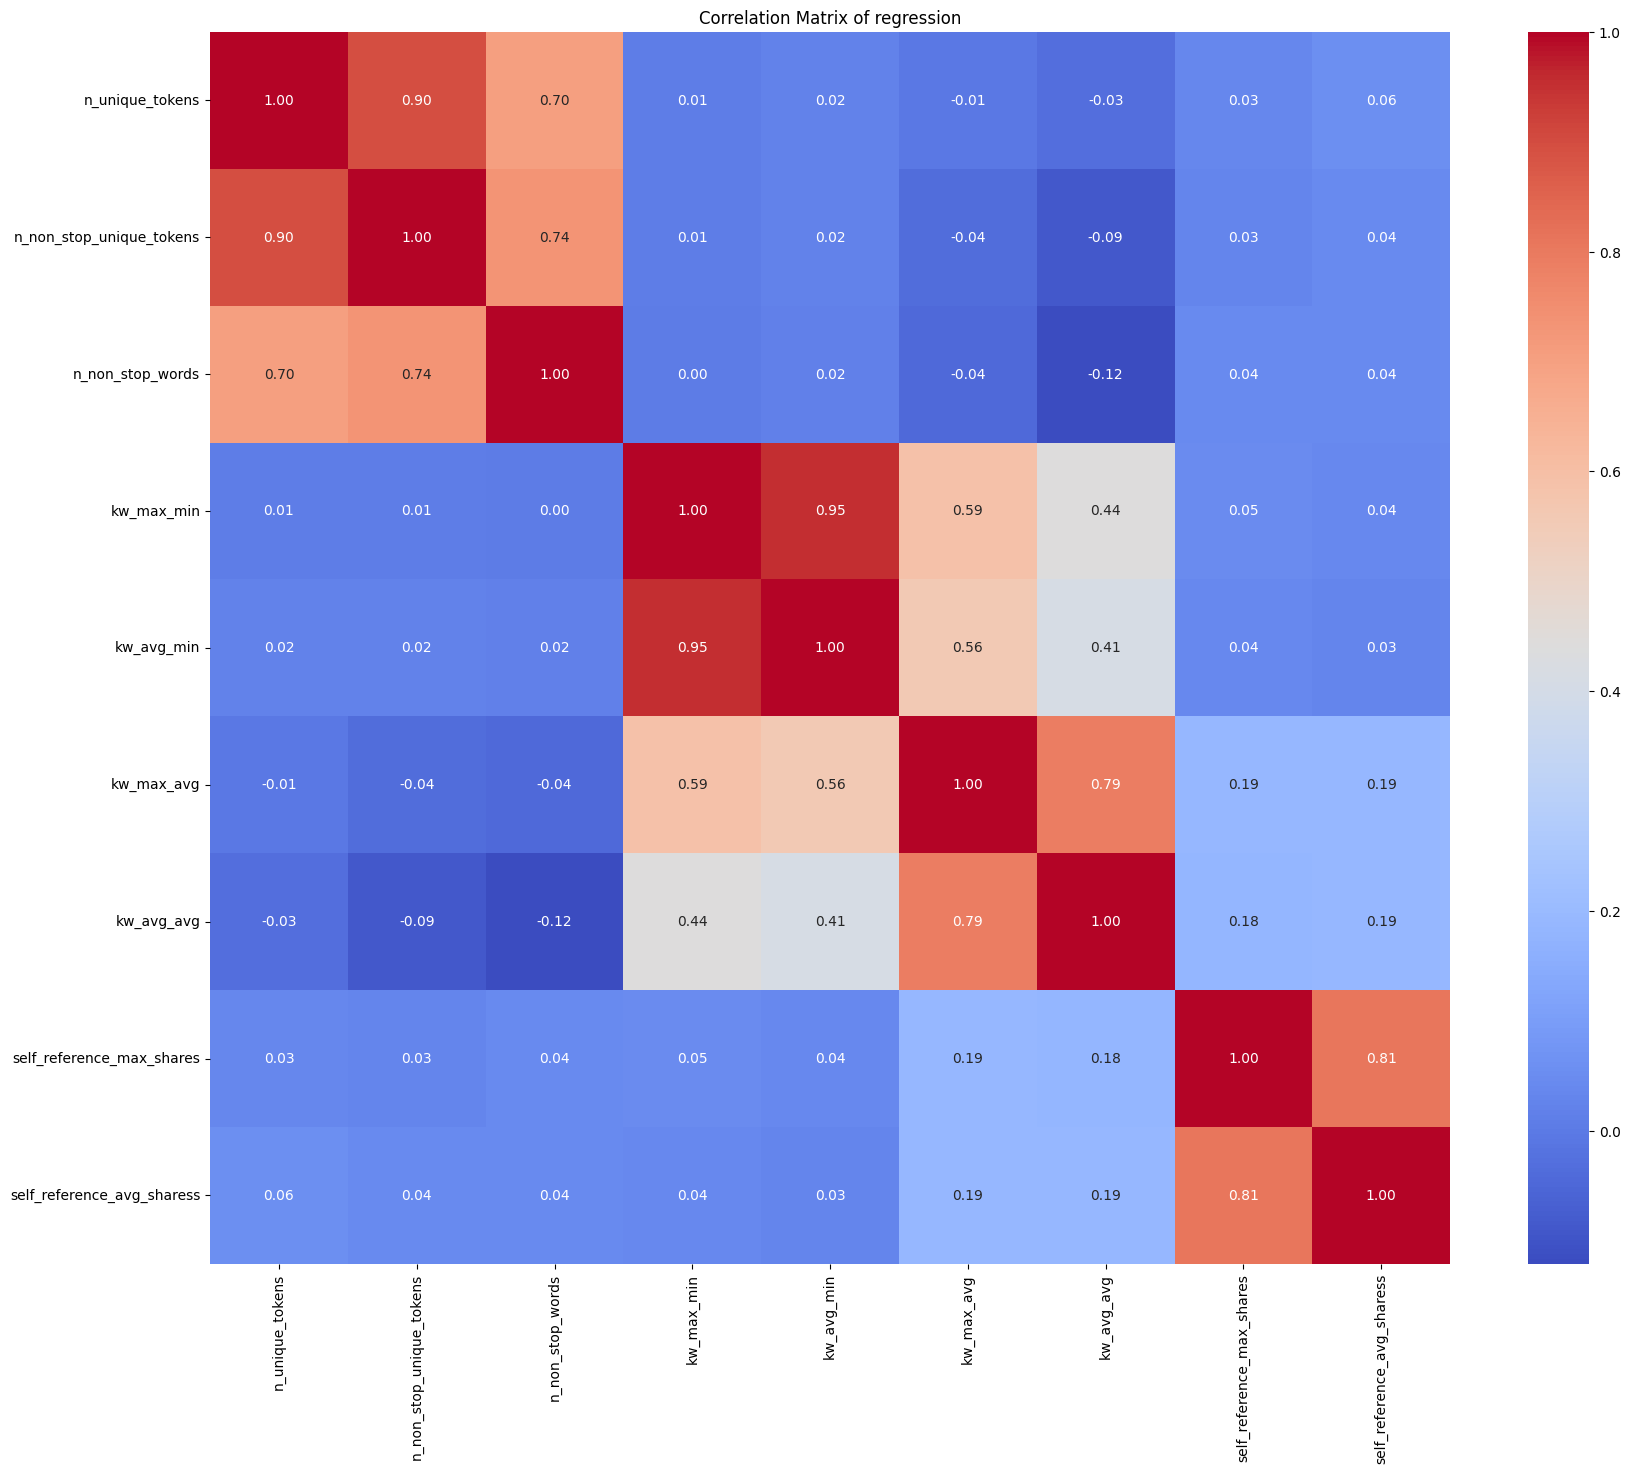

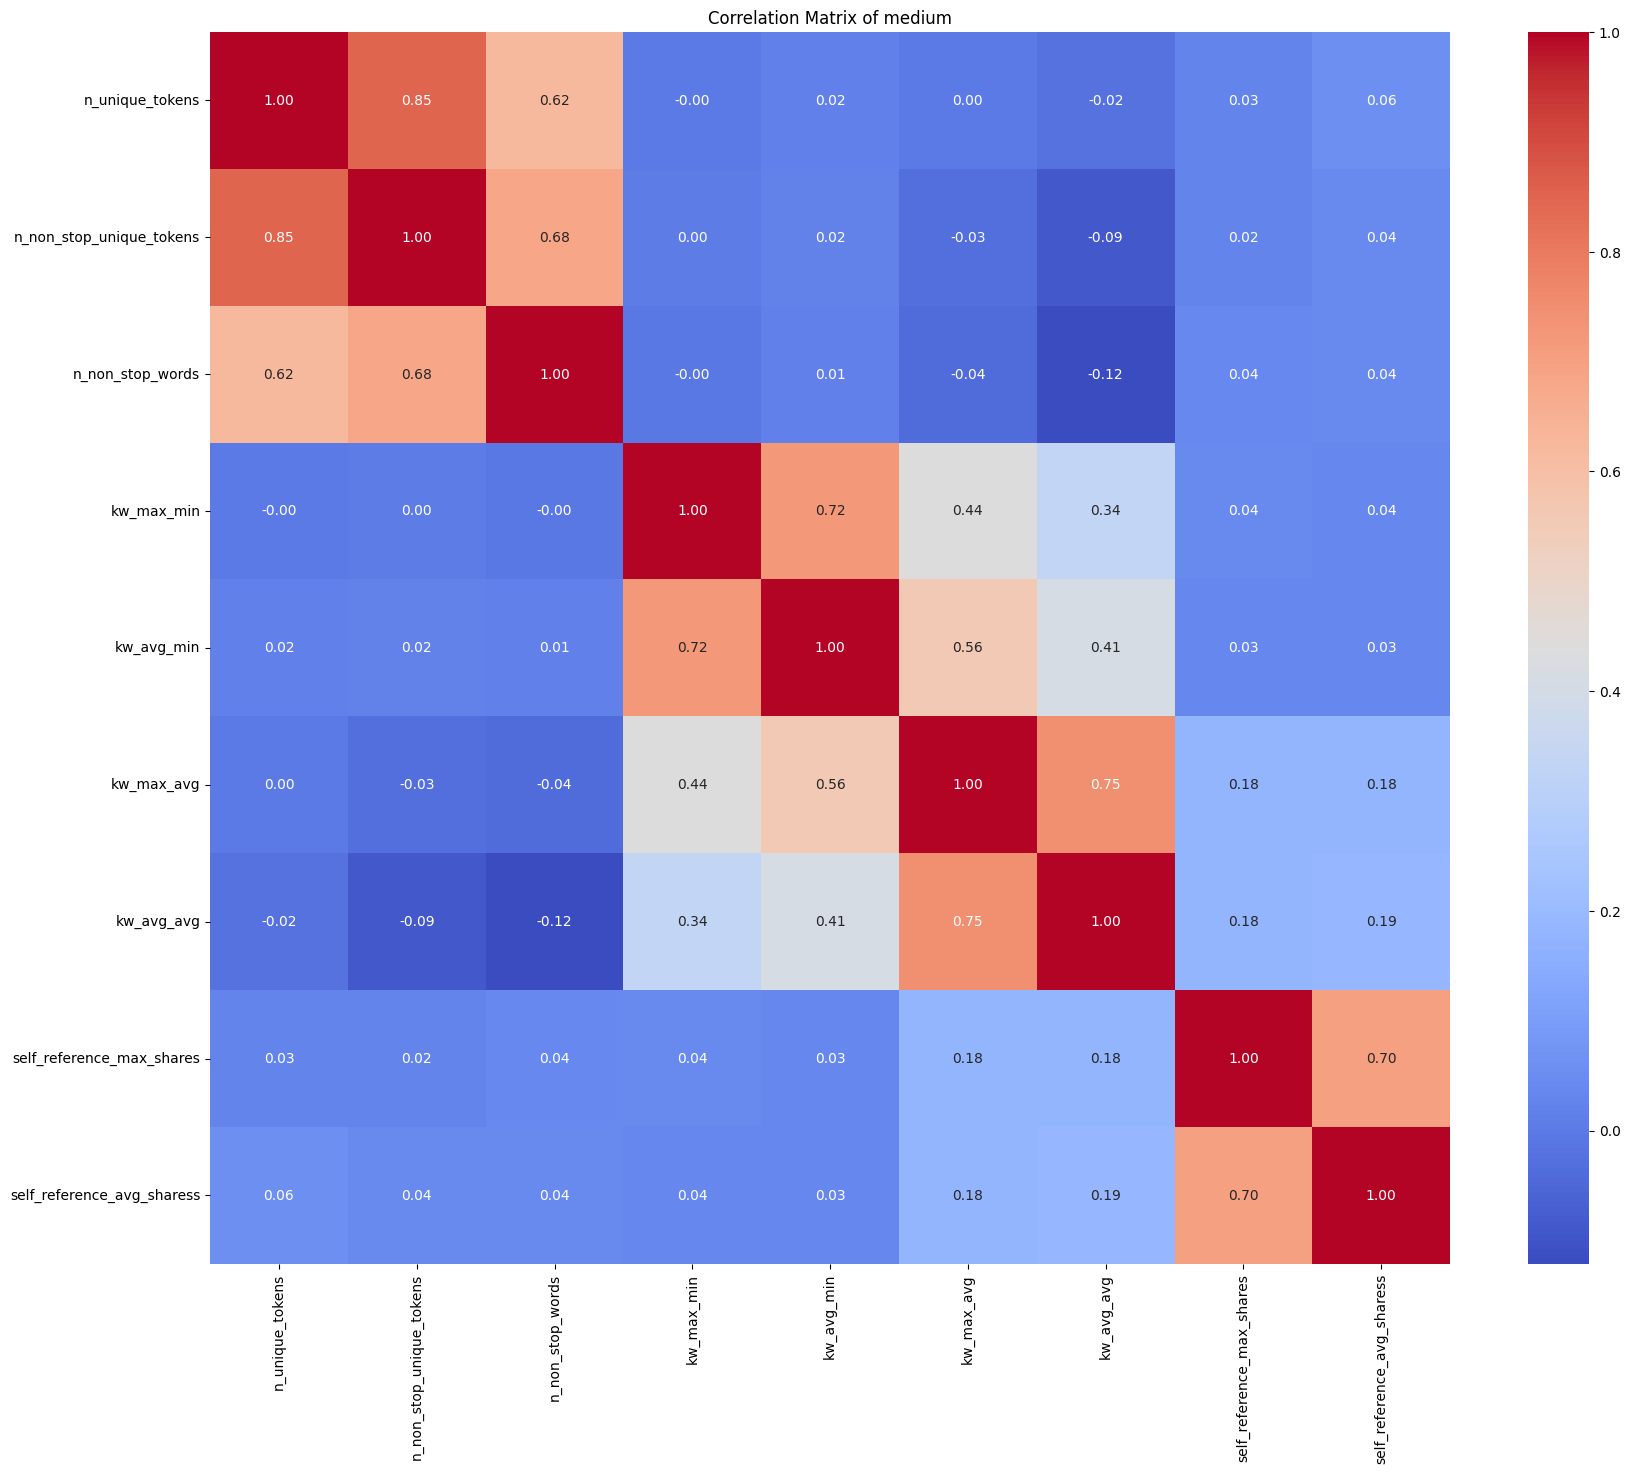

In [ ]:
reg = pd.read_csv("/content/drive/MyDrive/패턴인식/train_clean_reg_filtered.csv")
com = pd.read_csv("/content/drive/MyDrive/패턴인식/train_clean_com_filtered.csv")

# 상관관계 매트릭스 계산
corr_matrix = reg.corr()
corr_matrix_1 = com.corr()

# 상관관계 매트릭스 출력
print(corr_matrix)
print(corr_matrix_1)

# 상관관계 매트릭스를 히트맵으로 시각화
with PdfPages("reg_com_corr.pdf") as pdf:

    plt.figure(figsize=(20, 16))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title("Correlation Matrix of regression")
    pdf.savefig()
    plt.show()

    plt.figure(figsize=(20, 16))
    sns.heatmap(corr_matrix_1, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title("Correlation Matrix of medium")
    pdf.savefig()
    plt.show()

from google.colab import files
#files.download("reg_com_corr.pdf")
